In [1]:
import matplotlib.pyplot as plt
import numpy as np
from brian2 import ms, second, pA, nA, Hz, amp

/Users/amro/Documents/model-of-conscious-access/.venv/lib/python3.12/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


[ 779.39904785 1159.66772461 2429.         3063.55945945 2987.
 2077.         3896.78785959 4090.48228287 4812.         3200.
 8238.         4689.         4848.88323536 4921.05984786 4568.
 5153.17263737 2572.         7627.25       5429.59348396 6200.
 5452.23435663 5517.87417456  943.         6584.5        5716.03499428
 2294.         5838.10453013 2316.         7627.25       8337.
 7627.25       8500.         7637.5        6841.         6254.52004113
 6300.90992805 6306.81072198 6537.69540066 6825.         7717.50753428]
['V1', 'V2', 'V4', '1', '3', 'MT', 'V6', 'DP', 'TEO', '8m', 'F4', '5', '2', '8l', 'F1', 'STPc', '7A', '10', 'F3', 'TEpd', '46d', '9/46v', 'PBr', '9/46d', 'F5', '7m', '25', 'LIP', '32', 'STPi', '9', '45A', '8B', '7B', 'F2', 'F7', 'ProM', 'STPr', '24c', 'OPRO']


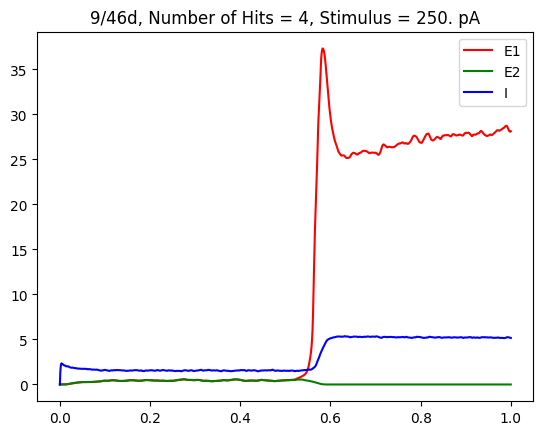

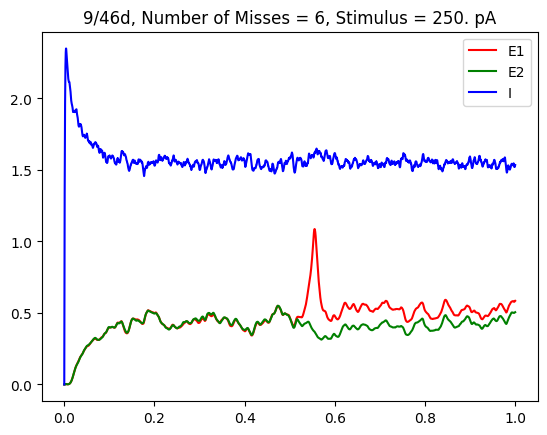

In [2]:
from LongRangeModel import LongRangeModel
from Params import Params

params = Params(simulation_time=1, dt=0.0001, num_of_trials=10, I_stim=250*pA)

model = LongRangeModel(params)

area = "9/46d"
area_index = model.area_names.index(area)

rEs = np.zeros((params.num_of_target_areas, len(model.t_span_euler), 2, params.num_of_trials))
rIs = np.zeros((params.num_of_target_areas, len(model.t_span_euler), params.num_of_trials))

hit_trials = np.zeros(params.num_of_trials)

for trial in range(params.num_of_trials):
    result = model.run()
    rEs[:, :, :, trial] = result[0]
    # print(rEs[area_index, :, 0, trial][rEs[area_index, :, 0, trial] > 10])

    if(np.any(result[0][area_index, :, 0] > 10)):
        hit_trials[trial] = True
    else:
        hit_trials[trial] = False

    rIs[:, :, trial] = result[1]

# area_index = model.area_names.index("V1")
rEs_hit_trials = rEs[:, :, :, hit_trials==True]
rIs_hit_trials = rIs[:, :, hit_trials==True]

num_of_hits = rEs_hit_trials[area_index, :, 0].shape[1]

rEs_miss_trials = rEs[:, :, :, hit_trials==False]
rIs_miss_trials = rIs[:, :, hit_trials==False]

num_of_misses = rEs_miss_trials[area_index, :, 0].shape[1]

# for i, area in enumerate(model.area_names):
if(num_of_hits > 0):
    plt.plot(model.t_span_euler, np.mean(rEs_hit_trials[area_index, :, 0], axis=1), color="red", label="E1")
    plt.plot(model.t_span_euler, np.mean(rEs_hit_trials[area_index, :, 1], axis=1), color="green", label="E2")
    plt.plot(model.t_span_euler, np.mean(rIs_hit_trials[area_index], axis=1), color="blue", label="I")
    plt.title(f"{area}, Number of Hits = {num_of_hits}, Stimulus = {params.I_stim}")
    plt.legend()
    plt.show()

if(num_of_misses > 0):
    plt.plot(model.t_span_euler, np.mean(rEs_miss_trials[area_index, :, 0], axis=1), color="red", label="E1")
    plt.plot(model.t_span_euler, np.mean(rEs_miss_trials[area_index, :, 1], axis=1), color="green", label="E2")
    plt.plot(model.t_span_euler, np.mean(rIs_miss_trials[area_index], axis=1), color="blue", label="I")
    plt.title(f"{area}, Number of Misses = {num_of_misses}, Stimulus = {params.I_stim}")
    plt.legend()
    plt.show()

